In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../')

In [2]:
from Modules.scraping import *
from Modules.supportFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = cut_down(scrap_covid_data())

# START scraping
### Requesting url nr 1
### Requesting url nr 2
### Requesting url nr 3
# END scraping


In [7]:
def find_timepoint_zero(df):
    df["Timepoint"] = -1

    point_zero = df.loc[df['Infected']>0, "Date"][0]
    df.loc[df['Date'] == point_zero, "Timepoint"] = 0

    previous = -1
    for i, row in df.iterrows():
        if i == point_zero or previous != -1:
            previous = previous + 1
            df.at[i,'Timepoint'] = previous
            
    return df

Text(0,0.5,'New_Infections')

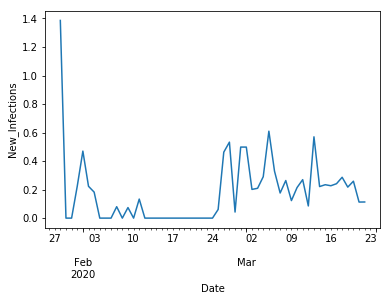

In [51]:
# Get German data
DE = country_filter(data, Country='Germany')
DE = find_timepoint_zero(DE)
DE = DE[DE.Timepoint != -1]

In [46]:
fig, ax = plt.subplots()
DE.loc[:,'Infected'].diff().iloc[1:].plot()
ax.set_ylabel('New_Infections')

<bound method NDFrame.head of Date
2020-01-27     0.000000
2020-01-28     1.386294
2020-01-29     1.386294
2020-01-30     1.386294
2020-01-31     1.609438
2020-02-01     2.079442
2020-02-02     2.302585
2020-02-03     2.484907
2020-02-04     2.484907
2020-02-05     2.484907
2020-02-06     2.484907
2020-02-07     2.564949
2020-02-08     2.564949
2020-02-09     2.639057
2020-02-10     2.639057
2020-02-11     2.772589
2020-02-12     2.772589
2020-02-13     2.772589
2020-02-14     2.772589
2020-02-15     2.772589
2020-02-16     2.772589
2020-02-17     2.772589
2020-02-18     2.772589
2020-02-19     2.772589
2020-02-20     2.772589
2020-02-21     2.772589
2020-02-22     2.772589
2020-02-23     2.772589
2020-02-24     2.772589
2020-02-25     2.833213
2020-02-26     3.295837
2020-02-27     3.828641
2020-02-28     3.871201
2020-02-29     4.369448
2020-03-01     4.867534
2020-03-02     5.068904
2020-03-03     5.278115
2020-03-04     5.568345
2020-03-05     6.177944
2020-03-06     6.507278
2020-

In [87]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(np.log(DE.loc[:,'Infected'])[5:], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=False,
                           d=1, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=-0.175, BIC=7.855, Fit time=0.150 seconds
Fit ARIMA: order=(0, 1, 0); AIC=1.782, BIC=5.797, Fit time=0.009 seconds
Fit ARIMA: order=(1, 1, 0); AIC=0.020, BIC=6.042, Fit time=0.034 seconds
Fit ARIMA: order=(0, 1, 1); AIC=0.156, BIC=6.178, Fit time=0.026 seconds
Fit ARIMA: order=(2, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2); AIC=3.528, BIC=15.572, Fit time=0.338 seconds
Total fit time: 0.594 seconds
-0.17457796155616734


In [93]:

future_forecast = stepwise_model.predict(n_periods=5)
print(future_forecast)
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

[5.21818245 5.37895836 5.54033486 5.70174273 5.86315223]


ValueError: Shape of passed values is (1, 5), indices imply (1, 20)

In [80]:
future_forecast.index

DatetimeIndex(['2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
train = pd.Series(np.log(DE.loc[:,'Infected'])[5:-5])
test = pd.Series(np.log(DE.loc[:,'Infected'])[5:])
stepwise_model.fit(train)

In [92]:
forecast = stepwise_model.forecast(n_periods=5)

AttributeError: 'ARIMA' object has no attribute 'forecast'